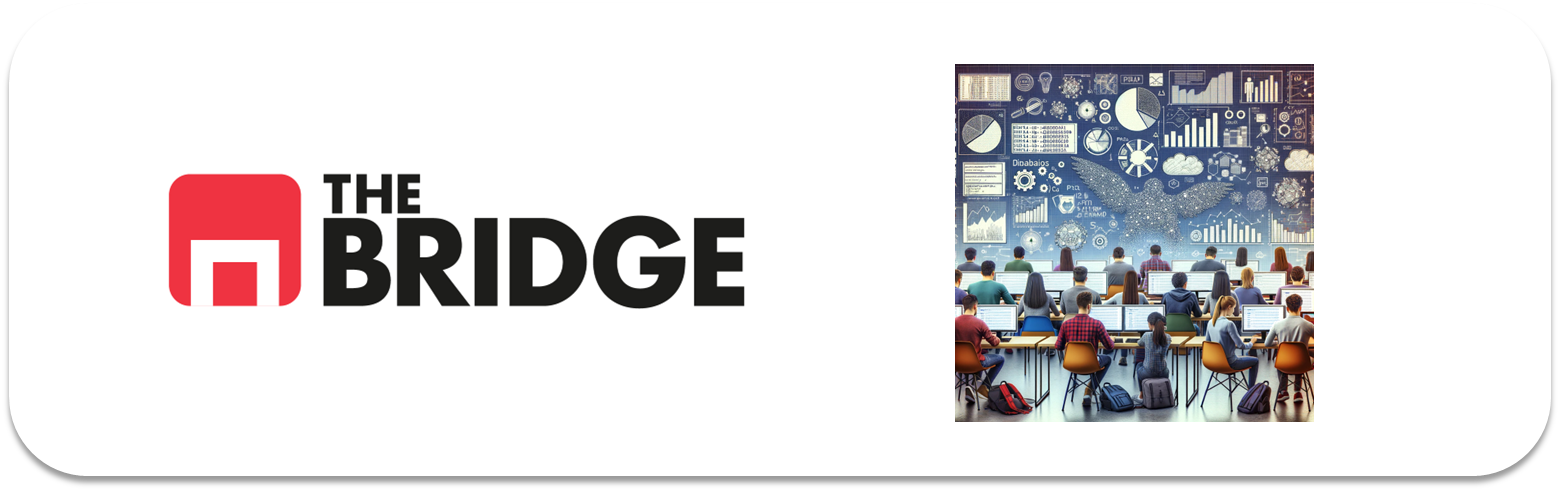

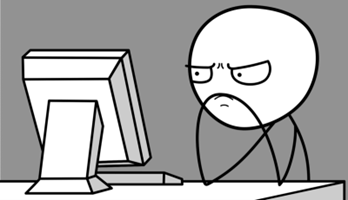

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [3]:
df_car = pd.read_csv("./data/CarPrice_Assignment.csv")
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [ ]:

df_car.drop(columns = ["car_ID"],inplace=True)

In [16]:
target = "price"

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [5]:
train_set,test_set = train_test_split(df_car,test_size=0.2,random_state=42)

### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

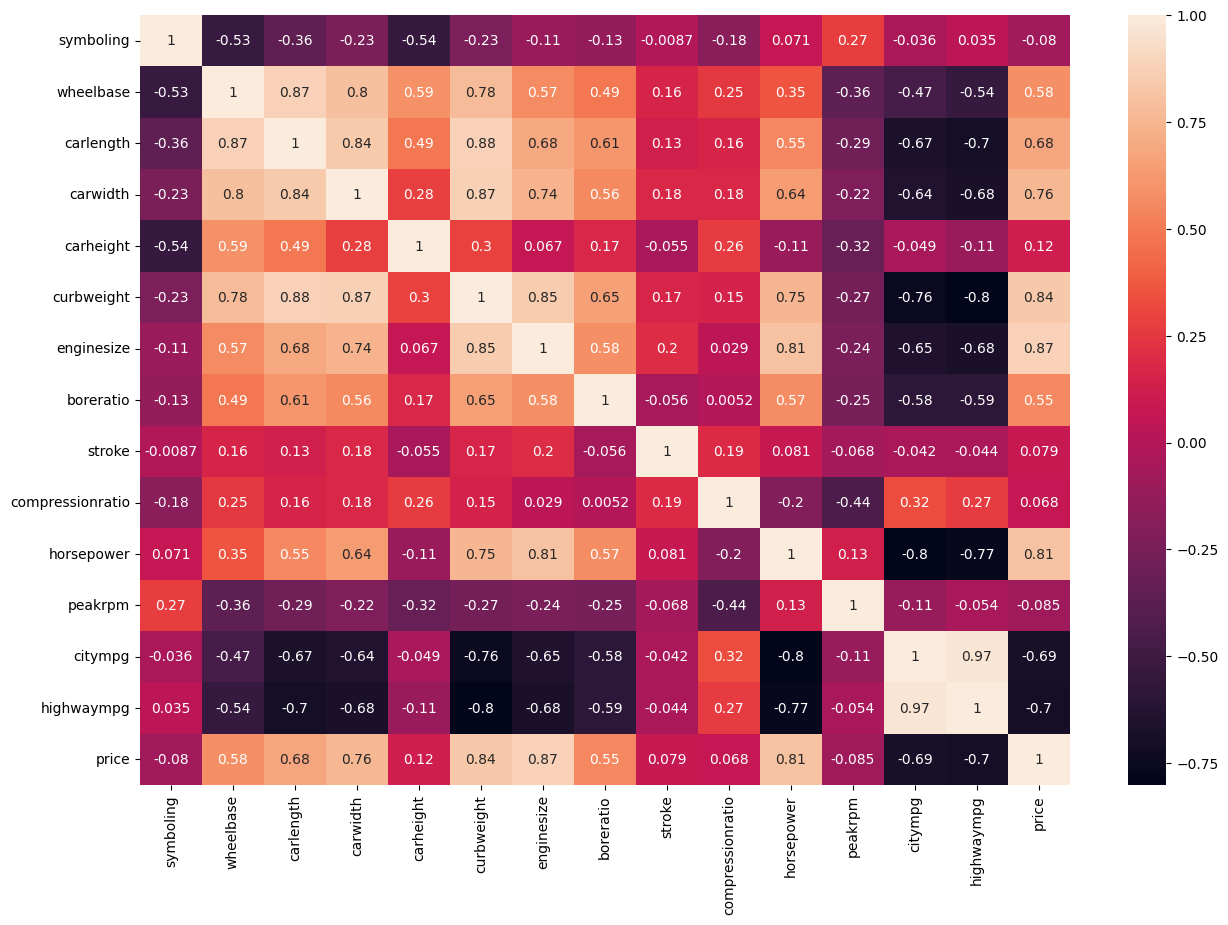

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df_car.corr(numeric_only=True),annot=True)
plt.show()

Podemos ver que los que más correlacion tienen con price son: enginesize,curbweight,horsepower

In [12]:
features_num = df_car.corr(numeric_only=True).columns.to_list()[:-1]
features_num

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [17]:
# Separación x e y
X_train = train_set.drop(columns= ["price"])
y_train = train_set[target]

X_test = test_set.drop(columns = [target])
y_test = test_set[target]

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)




LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [19]:
predictions = lin_reg.predict(X_train)

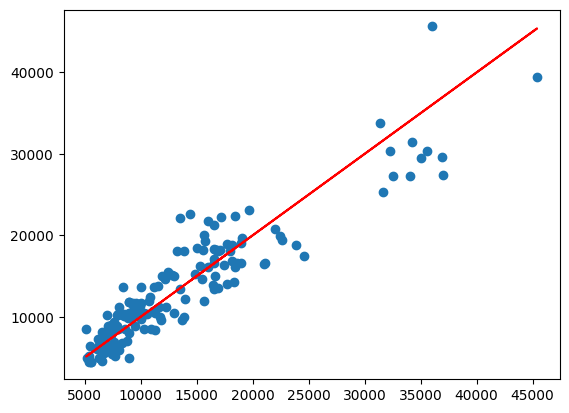

In [20]:
plt.scatter(y_train, predictions)
plt.plot(y_train, y_train, "r")

In [22]:
print("Errores de entrenamiento con train set")
print("MAE: ", mean_absolute_error(y_train,predictions))
print("MSE: ", mean_squared_error(y_train,predictions))
print("RMSE: ",np.sqrt(mean_squared_error(y_train,predictions)))
print("R2: ",lin_reg.score(X_train,y_train))

Errores de entrenamiento con train set
MAE:  2186.495238619768
MSE:  8477376.468057917
RMSE:  2911.593458582073
R2:  0.8578523829898764


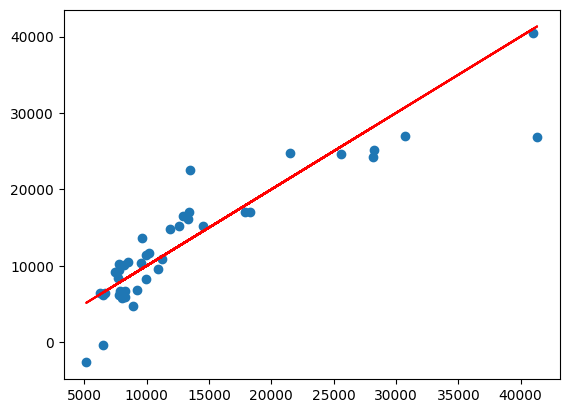

In [24]:
predictions_test = lin_reg.predict(X_test)
plt.scatter(y_test, predictions_test)
plt.plot(y_test, y_test,"-r")

In [25]:
print("Errores de entrenamiento con test set")
print("MAE: ", mean_absolute_error(y_test,predictions_test))
print("MSE: ", mean_squared_error(y_test,predictions_test))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions_test)))
print("R2: ",lin_reg.score(X_test,y_test))

Errores de entrenamiento con test set
MAE:  2680.4299831594244
MSE:  14358029.116948422
RMSE:  3789.1990073033144
R2:  0.8181239192410048


### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

In [26]:
ridge_R = Ridge(alpha=10)
ridge_R.fit(X_train,y_train)
predictions_ridge = ridge_R.predict(X_train)
print("MAE: ",mean_absolute_error(y_train,predictions_ridge))
print("MSE: ",mean_squared_error(y_train,predictions_ridge))
print("RMSE: ",np.sqrt(mean_squared_error(y_train,predictions_ridge)))
print("R2: ",ridge_R.score(X_train,y_train))

MAE:  2158.243656697338
MSE:  8866123.31820579
RMSE:  2977.60362006191
R2:  0.8513339231129411


### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

In [27]:
ridge_R.predict(X_test)
predictions_ridge_test = ridge_R.predict(X_test)
print("MAE: ",mean_absolute_error(y_test,predictions_ridge_test))
print("MSE: ",mean_squared_error(y_test,predictions_ridge_test))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions_ridge_test)))
print("R2: ",ridge_R.score(X_test,y_test))


MAE:  2683.5502270180973
MSE:  14118957.772767346
RMSE:  3757.5201626561297
R2:  0.821152284676628


### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

In [29]:
lasso_L = Lasso(alpha=125)
lasso_L.fit(X_train,y_train)
predictions_lasso = lasso_L.predict(X_train)
print("MAE: ",mean_absolute_error(y_train,predictions_lasso))
print("MSE: ",mean_squared_error(y_train,predictions_lasso))
print("RMSE: ",np.sqrt(mean_squared_error(y_train,predictions_lasso)))
print("R2: ",lasso_L.score(X_train,y_train))
print("*"*50)
predictions_lasso_test = lasso_L.predict(X_test)
print("MAE: ",mean_absolute_error(y_test,predictions_lasso_test))
print("MSE: ",mean_squared_error(y_test,predictions_lasso_test))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions_lasso_test)))
print("R2: ",lasso_L.score(X_test,y_test))

MAE:  2160.7677449902203
MSE:  8877155.12413877
RMSE:  2979.4555079978572
R2:  0.85114894313351
**************************************************
MAE:  2720.0084839611914
MSE:  14195935.840034952
RMSE:  3767.749439656909
R2:  0.8201771878116615


### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

In [30]:
ElasticNet_RL = ElasticNet(alpha=0.2,l1_ratio=0.7)
ElasticNet_RL.fit(X_train,y_train)
predictions_ElasticNet = ElasticNet_RL.predict(X_train)
print("MAE: ",mean_absolute_error(y_train,predictions_ElasticNet))
print("MSE: ",mean_squared_error(y_train,predictions_ElasticNet))
print("RMSE: ",np.sqrt(mean_squared_error(y_train,predictions_ElasticNet)))
print("R2: ",ElasticNet_RL.score(X_train,y_train))
print("*"*50)
predictions_ElasticNet_test = ElasticNet_RL.predict(X_test)
print("MAE: ",mean_absolute_error(y_test,predictions_ElasticNet_test))
print("MSE: ",mean_squared_error(y_test,predictions_ElasticNet_test))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions_ElasticNet_test)))
print("R2: ",ElasticNet_RL.score(X_test,y_test))

MAE:  2158.1465786718622
MSE:  8860451.22887099
RMSE:  2976.651008914379
R2:  0.8514290320166742
**************************************************
MAE:  2683.009361902569
MSE:  14110909.146069543
RMSE:  3756.4490075162134
R2:  0.8212542382711894


### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [31]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
symboling,259.207046
wheelbase,835.387850
carlength,-937.566044
carwidth,1112.646820
carheight,497.057372
curbweight,227.500700
enginesize,4976.563274
boreratio,-97.680684
stroke,-1010.387520
compressionratio,1387.225279


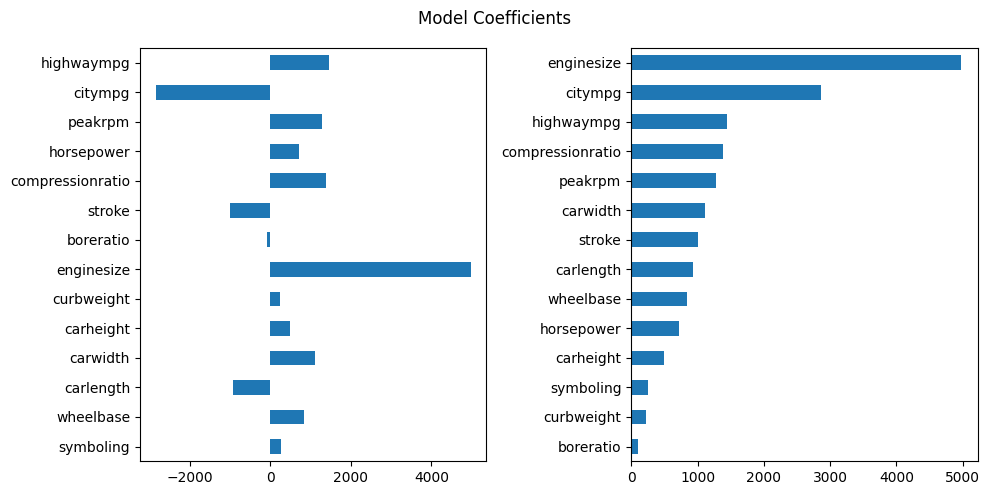

In [33]:
show_coefs(lin_reg)

,coefs
symboling,298.268290
wheelbase,399.106955
carlength,-260.468831
carwidth,1075.310793
carheight,286.690243
curbweight,801.906271
enginesize,3666.715607
boreratio,-39.792695
stroke,-798.377036
compressionratio,1002.400432


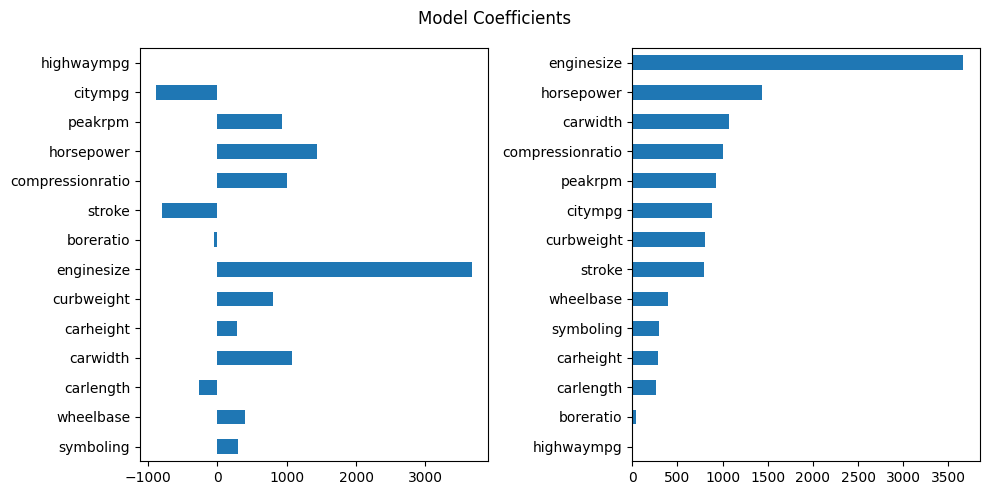

In [34]:
show_coefs(ridge_R)

,coefs
symboling,3.897387
wheelbase,0.000000
carlength,0.000000
carwidth,1185.253288
carheight,193.993785
curbweight,260.713690
enginesize,4368.898684
boreratio,0.000000
stroke,-754.360885
compressionratio,965.709886


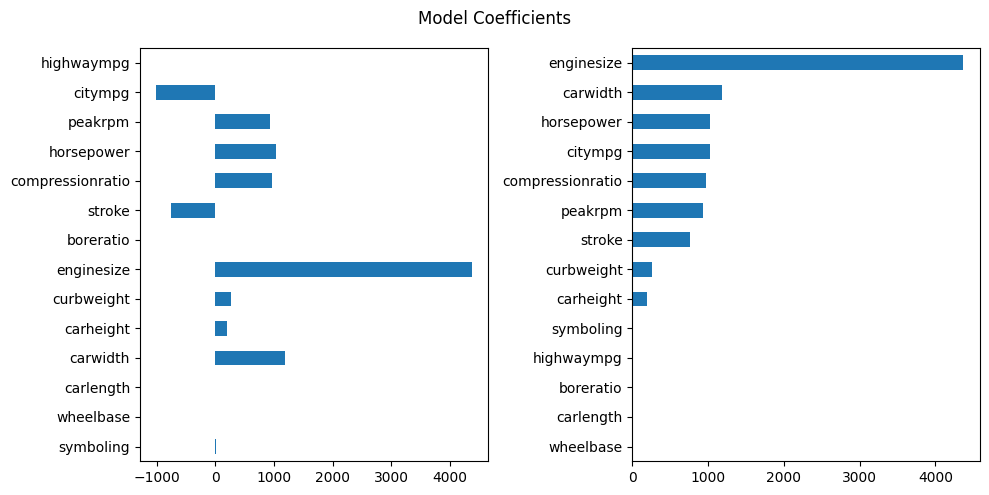

In [36]:
show_coefs(lasso_L)

,coefs
symboling,298.186870
wheelbase,400.487326
carlength,-264.005043
carwidth,1075.748004
carheight,288.803417
curbweight,797.255150
enginesize,3678.052872
boreratio,-40.367076
stroke,-800.167127
compressionratio,1004.958358


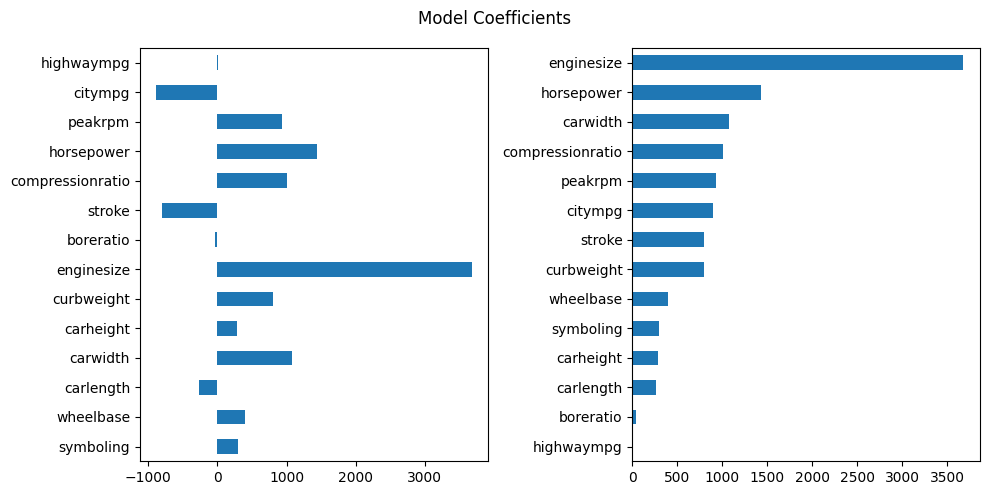

In [32]:
show_coefs(ElasticNet_RL)